In [161]:
# Make sure that the necessary packages are installed
import sys

In [162]:
# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

# Numerical and array operations
import numpy as np

from scipy.ndimage.filters import uniform_filter1d

# Format the output
from IPython.display import display, Markdown, Latex

## Function To Calculate The Antenna Gain

In [163]:
def gain(frequency, S21_horn, S21_left, S21_down, S21_right, S21_up, distance1, distance2, horn_gain):
    c = 3*10^8
    FSPL1 = 20*np.log10(distance1) + 20*np.log10(frequency*np.power(10,9)) + 20*np.log10(4*np.pi/c)
    FSPL2 = 20*np.log10(distance2) + 20*np.log10(frequency*np.power(10,9)) + 20*np.log10(4*np.pi/c)
    FSPLdif = FSPL2-FSPL1

    E_left = np.power(10, S21_left/20)
    E_down = np.power(10, S21_down/20)
    E_right = np.power(10, S21_right/20)
    E_up = np.power(10, S21_up/20)

    E_x = (E_left + E_right)/2
    E_y = (E_up + E_down)/2 

    E = np.sqrt(np.power(E_x, 2) + np.power(E_y, 2))

    Gain = 20*np.log10(E) - S21_horn + horn_gain + FSPLdif

    return Gain

## Import data

In [164]:
horn_file = np.loadtxt('Raw Data/Gain Measurement/S21_horn-horn.txt')
patch_file_d = np.loadtxt('Raw Data/Gain Measurement/S21_horn-patch_DOWN.txt')
patch_file_l = np.loadtxt('Raw Data/Gain Measurement/S21_horn-patch_LEFT.txt')
patch_file_u = np.loadtxt('Raw Data/Gain Measurement/S21_horn-patch_RIGHT.txt')
patch_file_r = np.loadtxt('Raw Data/Gain Measurement/S21_horn-patch_UP.txt')

S21_horn = np.asarray([s[1] for s in horn_file])
frequency = np.asarray([f[0] for f in horn_file])
S21_down = np.asarray([s[1] for s in patch_file_d])
S21_left = np.asarray([s[1] for s in patch_file_l])
S21_right = np.asarray([s[1] for s in patch_file_r])
S21_up = np.asarray([s[1] for s in patch_file_u])


## Calculate Antenna Gain

In [165]:
Gain = gain(frequency, S21_horn, S21_left, S21_down, S21_right, S21_up, 1.4, 1.69, 11)

(&lt;matplotlib.patches.Rectangle at 0x268d8273880&gt;,
 (&lt;matplotlib.patches.ConnectionPatch at 0x268d80c2850&gt;,
  &lt;matplotlib.patches.ConnectionPatch at 0x268d80c2b80&gt;,
  &lt;matplotlib.patches.ConnectionPatch at 0x268d80c2970&gt;,
  &lt;matplotlib.patches.ConnectionPatch at 0x268d80adf70&gt;))

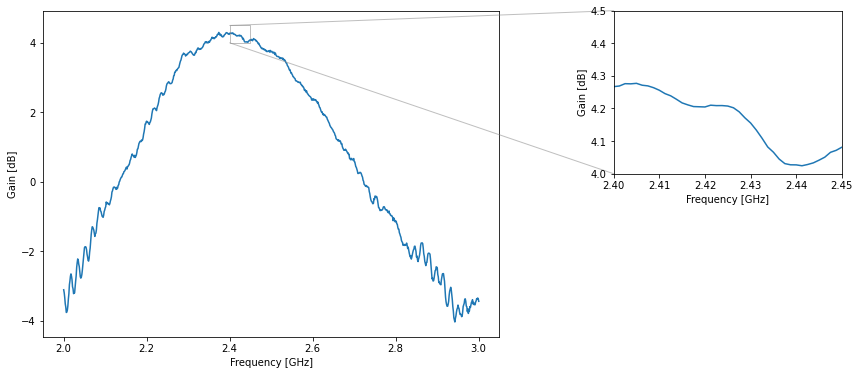

In [166]:
# Plot results 

# Create the figure and the space
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 2, 1)

# Plot the pattern
plot = ax.plot(frequency, Gain)

ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Gain [dB]')

# In-set axis
zoom = ax.inset_axes([1.25, 0.5, 0.5, 0.5])
smth = uniform_filter1d(Gain, size=5)
zoom.plot(frequency, smth)

zoom.set_xlim(2.4, 2.45)
zoom.set_ylim(4, 4.5)
zoom.set_xlabel('Frequency [GHz]')
zoom.set_ylabel('Gain [dB]')

ax.indicate_inset_zoom(zoom)